## Задача 1
Постройте график, Назовите график, Сделайте именование оси x и оси y, Сделайте выводы

### 1.1 Данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

In [2]:
df.price.value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

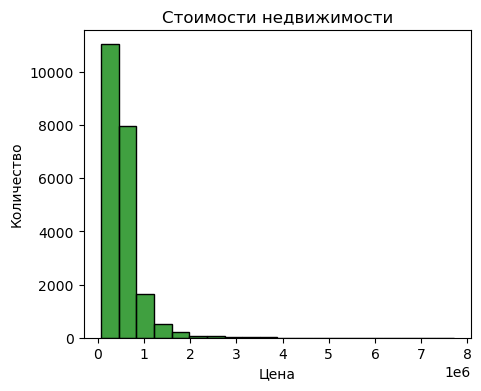

In [3]:
plt.figure(figsize=(5, 4))
sns.histplot(df['price'], bins=20, color = "green")
plt.title('Стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

***Преобладают дома стоимостью до 1 млн. условных единиц***

### 1.3 Изучите распределение квадратуры жилой площади

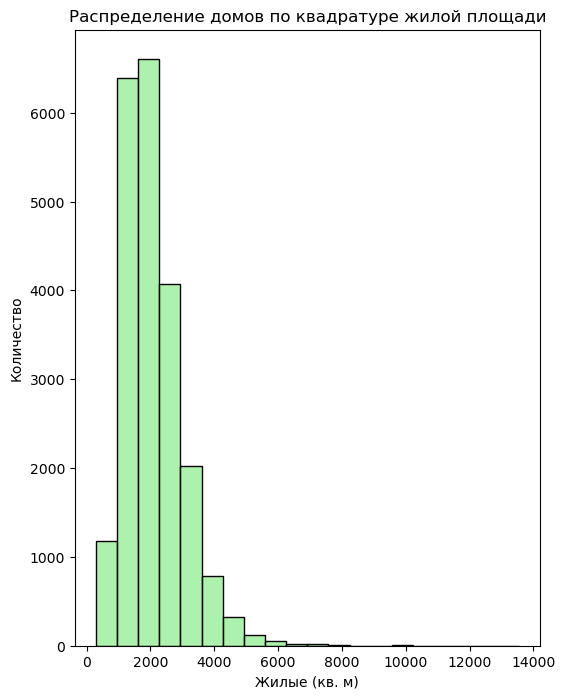

In [4]:
plt.figure(figsize=(6, 8))
sns.histplot(df['sqft_living'], bins=20, color = "lightgreen")
plt.title('Распределение домов по квадратуре жилой площади')
plt.xlabel('Жилые (кв. м)')
plt.ylabel('Количество');

***Преобладают дома жилой площадью от 1000 до 2000 кв. м***

### 1.4 Изучите распределение года постройки

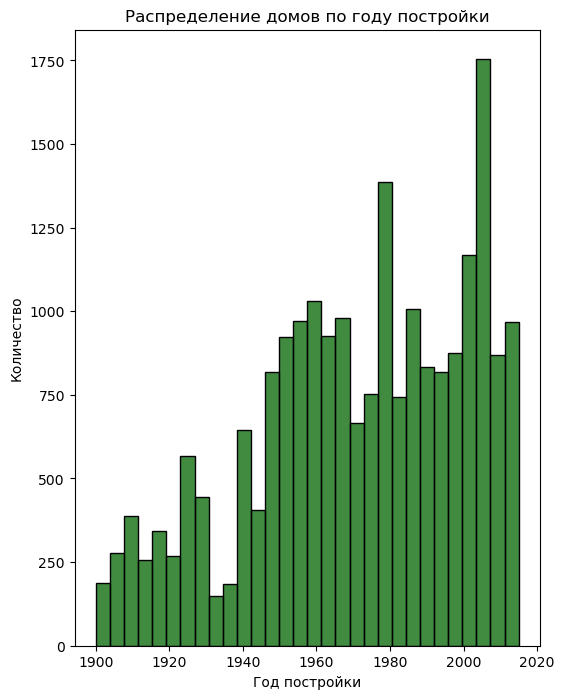

In [5]:
plt.figure(figsize=(6, 8))
sns.histplot(df['yr_built'], bins=30, color = "darkgreen")
plt.title('Распределение домов по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

***Преобладают дома постройки 1980-х и 2000-х г.г.***



## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную


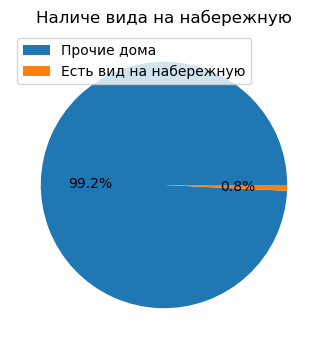

In [6]:
data = df['waterfront'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.title('Наличе вида на набережную')
plt.legend(['Прочие дома', 'Есть вид на набережную'], loc='upper left');

***Подавляющее большинство домов не имеет вида на набережную***

### 2.2 Изучите распределение этажей домов

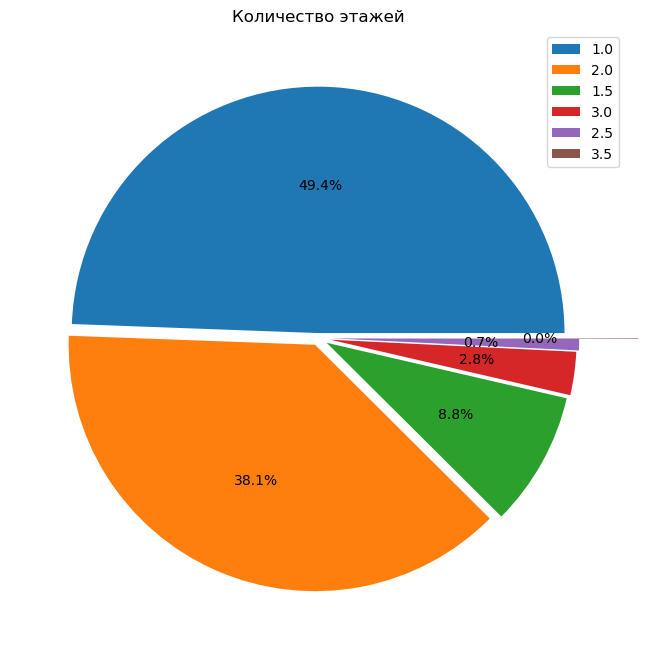

In [7]:
data = df['floors'].value_counts()
plt.figure(figsize=(10, 8))
expl = [0.02, 0.03, 0.04, 0.05, 0.06, 0.3]
plt.pie(data, autopct='%1.1f%%', explode=expl)
plt.title('Количество этажей')
plt.legend(data.index);

***Преобладают низкоэтажные строения (1, 2 этажа)***

### 2.3 Изучите распределение состояния домов

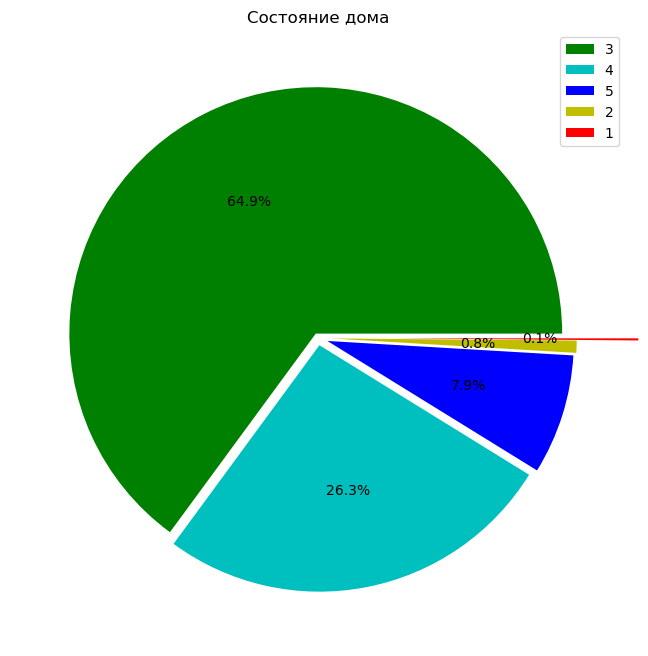

In [8]:
data = df['condition'].value_counts()
plt.figure(figsize=(10, 8))
expl = [0.02, 0.03, 0.04, 0.05, 0.3]
plt.pie(data, autopct='%1.1f%%', explode=expl, colors = ["g", "c", "b", "y", "r"])
plt.title('Состояние дома')
plt.legend(data.index);

***Преобладают дома в удовлетворительном состоянии ("3")***

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

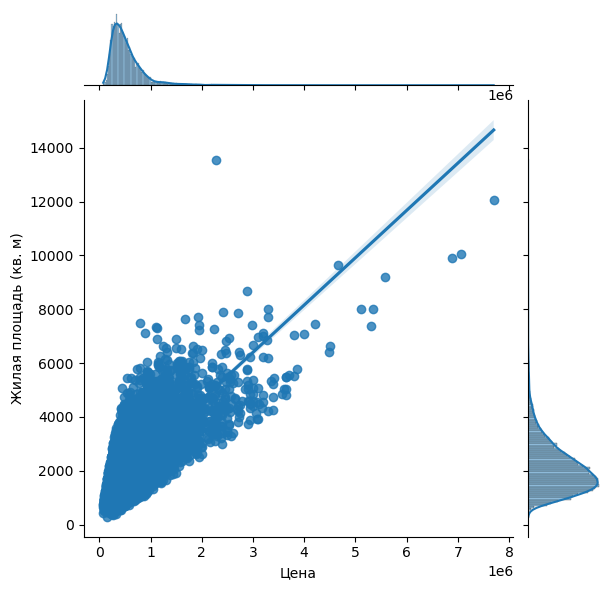

In [9]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');
plt.xlabel('Цена')
plt.ylabel('Жилая площадь (кв. м)');

***Стоимость дома повышается при увеличении площади дома***

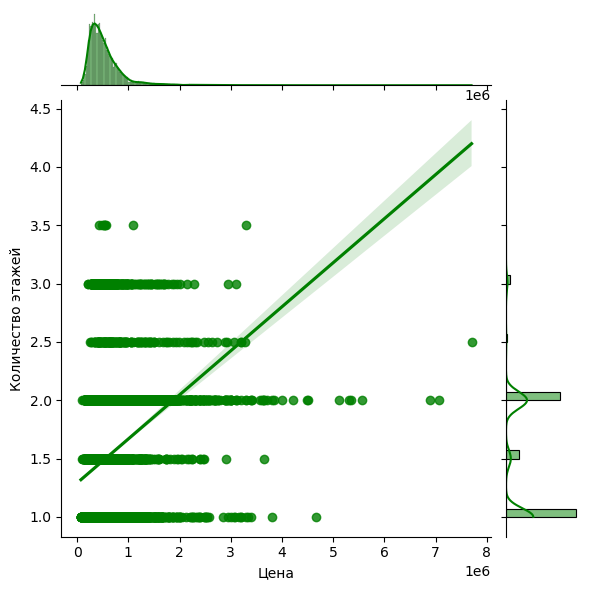

In [10]:
sns.jointplot(x=df['price'], y=df['floors'], kind='reg', color = 'green');
plt.xlabel('Цена')
plt.ylabel('Количество этажей');

***Количество этажей не оказывают сильного влияния на стоимость жилья, необходимо рассматривать другие параметры***

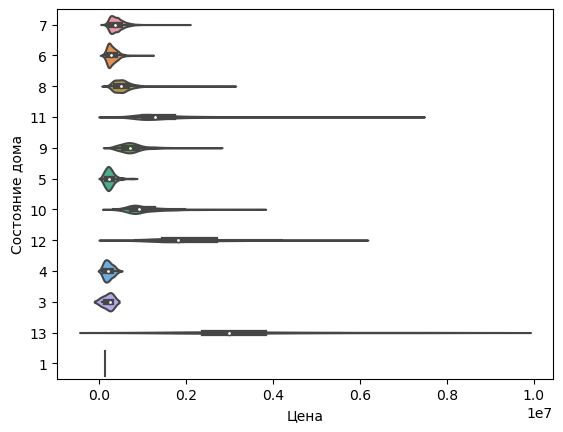

In [11]:
sns.violinplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('Цена')
plt.ylabel('Состояние дома');

***Наибольшую стоимость имеют дома, находящиеся в лучшем состоянии***

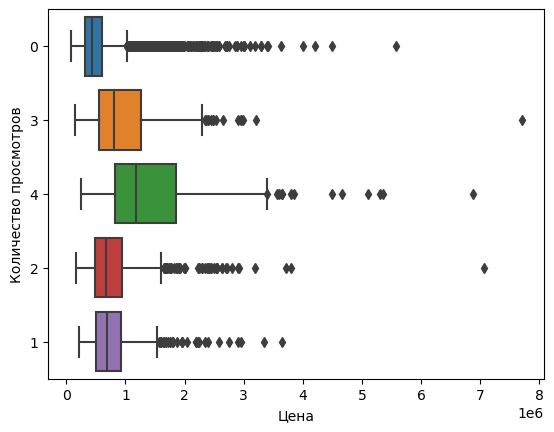

In [12]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('Цена')
plt.ylabel('Количество просмотров');

***Чаще смотрят дома стоимость от 1 до 2 млн***

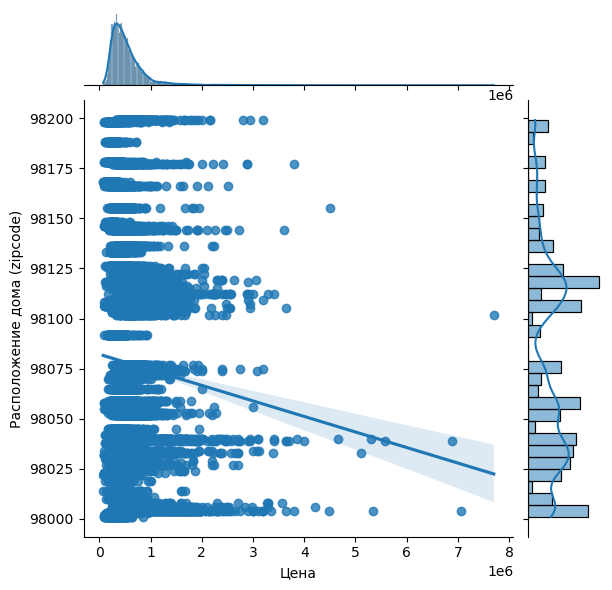

In [13]:
sns.jointplot(x=df['price'], y=df['zipcode'], kind='reg');
plt.xlabel('Цена')
plt.ylabel('Расположение дома (zipcode)');

***Дома расположены в одной местности, точное расположение не сильно влияет на стоимость дома***